In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF 
import numpy as np
from sklearn.metrics import mean_absolute_error

In [2]:
def process_data(file_paths):
    # Initialize empty lists to store data
    whisker1_data = []
    whisker2_data = []
    laser1_data = []
    laser2_data = []
    GT1_data = []
    GT2_data = []
    orientation_data = []
    position_data = []

    for file_path in file_paths:
        # Read data from file
        data = pd.read_csv(file_path)
        
        # Extract data columns
        whisker1_data.append(data.iloc[:, :3].values)
        whisker2_data.append(data.iloc[:, 3:6].values)
        laser1_data.append(data.iloc[:, 6].values)
        laser2_data.append(data.iloc[:, 7].values)
        GT1_data.append(data.iloc[:, -2].values)
        GT2_data.append(data.iloc[:, -1].values)
        orientation_data.append(data.iloc[:, 9].values)
        position_data.append(data.iloc[:, 11:13].values)
    
    # Concatenate data from all files
    whisker1_data = np.concatenate(whisker1_data)
    whisker2_data = np.concatenate(whisker2_data)
    laser1_data = np.concatenate(laser1_data)
    laser2_data = np.concatenate(laser2_data)
    GT1_data = np.concatenate(GT1_data)
    GT2_data = np.concatenate(GT2_data)
    orientation_data = np.concatenate(orientation_data)
    position_data = np.concatenate(position_data)
    
    return whisker1_data, whisker2_data, laser1_data, laser2_data, GT1_data, GT2_data, orientation_data, position_data

def filter_data(whisker_data,channel, laser_data, GT_data, threshold, orientation_data, position_data):
    filter_indices = (whisker_data[:,channel-1] >= threshold) & (GT_data > 0)
    whisker_filtered = whisker_data[filter_indices]
    laser_filtered = laser_data[filter_indices]
    GT_filtered = GT_data[filter_indices]
    orientation_filtered = orientation_data[filter_indices]
    position_filtered = position_data[filter_indices]
    return whisker_filtered, laser_filtered, GT_filtered, orientation_filtered, position_filtered

def filter_data_both1(whisker_data1, whisker_data2, channel, laser_data, GT_data1, GT_data2, threshold, orientation_data, position_data):
    filter_indices = (whisker_data1[:,0] >= threshold) & (whisker_data2[:,1] >= threshold) & (GT_data1 > 0) & (GT_data2 > 0)
    whisker_filtered = whisker_data1[filter_indices]
    laser_filtered = laser_data[filter_indices]
    GT_filtered = GT_data1[filter_indices]
    orientation_filtered = orientation_data[filter_indices]
    position_filtered = position_data[filter_indices]
    return whisker_filtered, laser_filtered, GT_filtered, orientation_filtered, position_filtered

def filter_data_both2(whisker_data1, whisker_data2, channel, laser_data, GT_data1, GT_data2, threshold, orientation_data, position_data):
    filter_indices = (whisker_data1[:,1] >= threshold) & (whisker_data2[:,0] >= threshold) & (GT_data1 > 0) & (GT_data2 > 0)
    whisker_filtered = whisker_data1[filter_indices]
    laser_filtered = laser_data[filter_indices]
    GT_filtered = GT_data2[filter_indices]
    orientation_filtered = orientation_data[filter_indices]
    position_filtered = position_data[filter_indices]
    return whisker_filtered, laser_filtered, GT_filtered, orientation_filtered, position_filtered

In [3]:
from sklearn.preprocessing import StandardScaler

file_paths = ['0326/data1.csv', '0326/data11.csv', '0326/data3.csv', '0326/data4.csv', 
              '0326/data5.csv', '0326/data6.csv', '0326/data7.csv', '0326/data8.csv', 
              '0326/data9.csv', '0326/data10.csv', '0326/data2.csv', '0326/data12.csv', '0326/test2.csv']
train_whisker1, train_whisker2, train_laser1, train_laser2, train_GT1, train_GT2, train_orientation, train_position= process_data(file_paths[:9])
test_whisker1, test_whisker2, test_laser1, test_laser2, test_GT1, test_GT2, test_orientation, test_position = process_data(file_paths[9:12])
real_whisker1, real_whisker2, real_laser1, real_laser2, real_GT1, real_GT2, real_orientation, real_position = process_data([file_paths[12]])
# print(real_whisker1)
# test_whisker1_1, test_whisker2_1, test_laser1_1, test_laser2_1, test_GT1_1, test_GT2_1, orientation_1, position_1 = process_data(file_paths[9])
# test_whisker1_2, test_whisker2_2, test_laser1_2, test_laser2_2, test_GT1_2, test_GT2_2, orientation_2, position_2 = process_data(file_paths[10])
# test_whisker1_3, test_whisker2_3, test_laser1_3, test_laser2_3, test_GT1_3, test_GT2_3, orientation_3, position_3 = process_data(file_paths[11])
filter_threshold = 10
train_whisker1_filtered1, train_laser1_filtered, train_GT1_filtered, _, _ = filter_data(train_whisker1, 1, train_laser1, train_GT1, filter_threshold, train_orientation, train_position)
train_whisker2_filtered1, train_laser2_filtered, train_GT2_filtered, _, _ = filter_data(train_whisker2, 2, train_laser2, train_GT2, filter_threshold, train_orientation, train_position)
test_whisker1_filtered1, test_laser1_filtered, test_GT1_filtered, test_orientation1_filtered, test_position1_filtered = filter_data_both1(test_whisker1, test_whisker2, 1, test_laser1, test_GT1, test_GT2, filter_threshold, test_orientation, test_position)
test_whisker2_filtered1, test_laser2_filtered, test_GT2_filtered, test_orientation2_filtered, test_position2_filtered = filter_data_both2(test_whisker2, test_whisker1, 2, test_laser2, test_GT1 ,test_GT2, filter_threshold, test_orientation, test_position)

# test_whisker1_1_filtered1, test_whisker2_1_filtered, test_laser1_1_filtered, test_laser2_1_filtered, test_GT1_1_filtered, test_GT2_1_filtered, orientation_1_filtered, position_1_filtered = process_data(file_paths[9])
# test_whisker1_2, test_whisker2_2, test_laser1_2, test_laser2_2, test_GT1_2, test_GT2_2, orientation_2, position_2 = process_data(file_paths[10])
# test_whisker1_3, test_whisker2_3, test_laser1_3, test_laser2_3, test_GT1_3, test_GT2_3, orientation_3, position_3 = process_data(file_paths[11])
scaler = StandardScaler()
train_whisker1_filtered1 = scaler.fit_transform(train_whisker1_filtered1)
test_whisker1_filtered1 = scaler.transform(test_whisker1_filtered1)
real_whisker1_filtered1 = scaler.transform(real_whisker1)
train_whisker2_filtered1 = scaler.fit_transform(train_whisker2_filtered1)
test_whisker2_filtered1 = scaler.transform(test_whisker2_filtered1)
real_whisker2_filtered1 = scaler.transform(real_whisker2)
train_GT1_NM = scaler.fit_transform(train_GT1_filtered.reshape(-1,1))
print(test_whisker1_filtered1)
mean_train = scaler.mean_
std_train = scaler.scale_
print(mean_train)
print(std_train)


filtered_data_counts = np.zeros((len(file_paths), 2), dtype=int)  # 2表示有两个过滤后的数据

# 针对每个文件分别过滤数据并统计数量
for i, file_path in enumerate(file_paths):
    whisker1, whisker2, laser1, laser2, GT1, GT2, orientation, position = process_data([file_path])
    
    # 进行数据过滤
    whisker1_filtered, laser1_filtered, GT1_filtered, _, _ = filter_data(whisker1, 1, laser1, GT1, filter_threshold, orientation, position)
    whisker2_filtered, laser2_filtered, GT2_filtered, _, _ = filter_data(whisker2, 2, laser2, GT2, filter_threshold, orientation, position)
    
    # 计算过滤后的数量并存储到数组中
    filtered_data_counts[i] = [whisker1_filtered.shape[0], whisker2_filtered.shape[0]]
    
train_whisker1_trial_size=filtered_data_counts[:9,0]
train_whisker2_trial_size=filtered_data_counts[:9,1]
test_whisker1_trial_size=filtered_data_counts[9:,0]
test_whisker2_trial_size=filtered_data_counts[9:,1]


[[-2.43357747  2.36815424  0.83805079]
 [-2.20121342  2.24234975  0.72783386]
 [-2.02689718  2.10079011  0.64680836]
 ...
 [-1.6158135   1.70836128  1.25688171]
 [-1.6609758   1.82454165  1.34921752]
 [-1.70789893  1.95116343  1.39700773]]
[45.58733941]
[20.80633402]


tensor([[22.4562],
        [21.7265],
        [24.8130],
        [26.7001],
        [27.6999],
        [26.0140],
        [26.5655],
        [30.7589],
        [29.5674],
        [34.2627],
        [41.8263],
        [41.9112],
        [44.1915],
        [44.8997],
        [46.8067],
        [42.3312],
        [41.1685],
        [42.5185],
        [41.2070],
        [43.2510],
        [41.2466],
        [39.8018],
        [39.4553],
        [39.6202],
        [35.9975],
        [36.1328],
        [32.1903],
        [32.2077],
        [31.1727],
        [32.3033],
        [30.8000],
        [31.0982]], device='cuda:0') tensor([19.3145, 22.7383, 26.0354, 29.1120, 32.2243, 35.0112, 37.6839, 40.0332,
        42.0660, 43.9104, 45.2878, 46.4570, 47.2020, 47.6143, 47.8780, 47.7431,
        47.4513, 46.7910, 46.0047, 44.8161, 43.5723, 42.2935, 40.6702, 38.9729,
        37.2845, 35.6557, 33.9148, 32.1568, 30.5856, 29.0172, 27.6664, 26.4161],
       device='cuda:0')
tensor([[142.3279],
        [

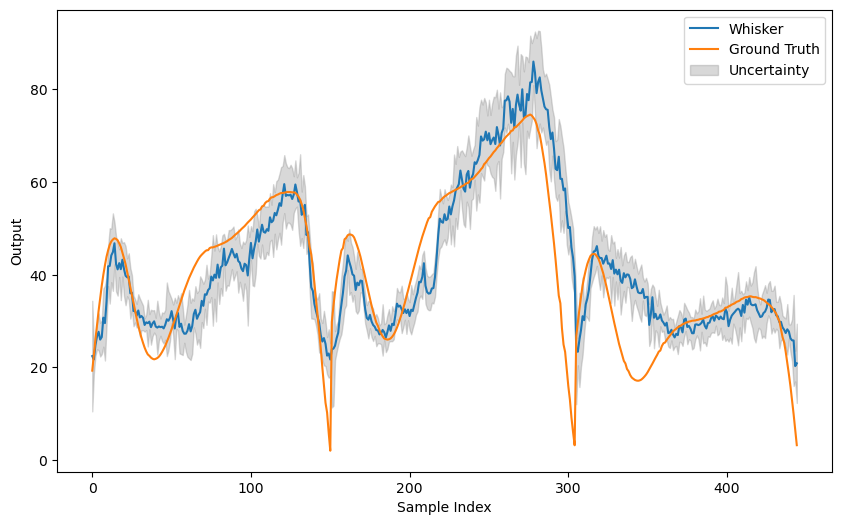

In [4]:
#whisker1 uncertainty aware mlp
from uncertainty import *
from model import *
from torch.utils.data import DataLoader, TensorDataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP_adf_dropout(input_size=3, hidden_size=32, output_size=1, p=0.05, noise_variance=0.01, min_variance=1e-3).to(device)
best_model_path='MLP_best_model_save/mlp_bs_32_lr_0.001_reg_0.001_do_0.1_rmse_9.3322_whisker1.pt'
model.load_state_dict(torch.load(best_model_path))
test_whisker_tensor = torch.Tensor(test_whisker1_filtered1)
test_GT_tensor = torch.Tensor(test_GT1_filtered)
test_dataset = TensorDataset(test_whisker_tensor, test_GT_tensor)
testloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
test_image_folder = 'UA_MLP_test_image_save_whisker1'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-3_modelvarianceweight_5_whisker1.png'
eval_time = time.time()
RMSE, MAE, neg_log_likelihood, test_pre1, test_uncertainty1 = evaluate(
        model,
        test_dataset,
        test_image_output_file,
        use_adf=True, 
        use_mcdo=True)

eval_time = time.time() - eval_time

print('RMSE                = {}'.format(RMSE))
print('MAE             = {}'.format(MAE))
print('Negative log-likelihood = {}'.format(neg_log_likelihood))
print('Time                    = {}'.format(eval_time))

MSE = 87.32363838298863
MAE = 6.504191439515416


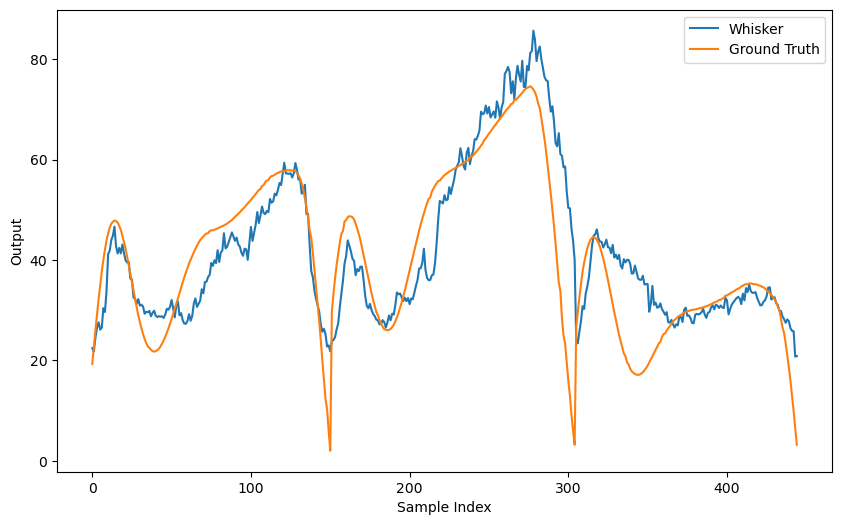

In [5]:
#KF whisker1
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilter
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filter(initial_state, test_pre):
    kf = KalmanFilter(initial_state, initial_covariance, process_noise, measurement_noise)
    estimates = [np.array([initial_state])]
    for z in test_pre[1:]:
        kf.predict()
        kf.update(np.array([z]))
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT1_filtered_1 = test_GT1_filtered[0:151]
test_GT1_filtered_2 = test_GT1_filtered[151:305]
test_GT1_filtered_3 = test_GT1_filtered[305:445]
test_pre1_1 = test_pre1[0:151]
test_pre1_2 = test_pre1[151:305]
test_pre1_3 = test_pre1[305:445]

# 初始状态和噪声配置
initial_states = [test_pre1_1[0], test_pre1_2[0], test_pre1_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[10]])
measurement_noise = np.array([[1]])

# 应用卡尔曼滤波
test_kal1_1 = apply_kalman_filter(initial_states[0], test_pre1_1)
test_kal1_2 = apply_kalman_filter(initial_states[1], test_pre1_2)
test_kal1_3 = apply_kalman_filter(initial_states[2], test_pre1_3)

# 合并结果
test_kal1 = test_kal1_1 + test_kal1_2 + test_kal1_3

# 计算损失
MSE_loss = mean_squared_error(test_kal1, test_GT1_filtered)
MAE_loss = mean_absolute_error(test_kal1, test_GT1_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'MLP_KF_test_image_save_whisker1'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_5_0.5_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal1, label='Whisker')
plt.plot(test_GT1_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

MSE = 128.58387334660142
MAE = 7.740151495804795


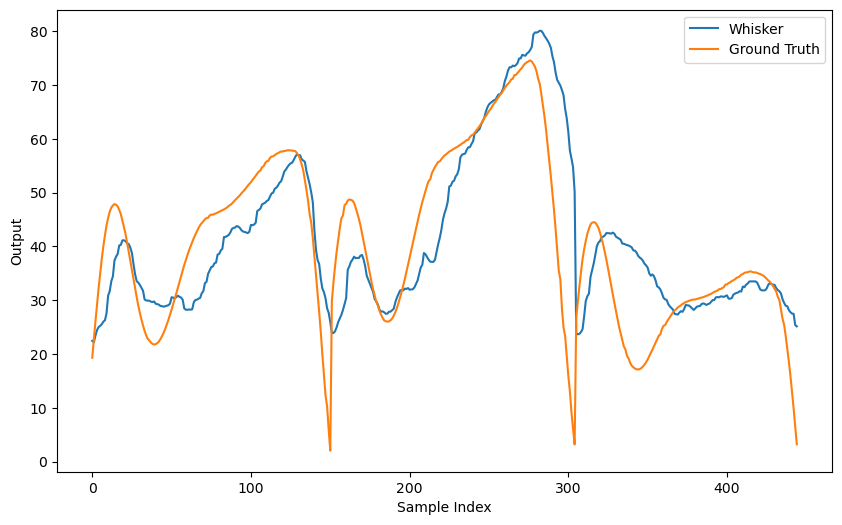

In [6]:
#uncertainty KF whisker1
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterUA
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filter(initial_state, test_pre, uncertainties):
    kf = KalmanFilterUA(initial_state, initial_covariance, process_noise)
    estimates = [np.array([initial_state])]
    for z, uncertainty in zip(test_pre[1:], uncertainties[1:]):
        kf.predict()
        measurement_noise = np.array([[uncertainty]])  # 动态测量噪声
        kf.update(np.array([z]), measurement_noise)  # 传递动态噪声到更新步骤
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT1_filtered_1 = test_GT1_filtered[0:151]
test_GT1_filtered_2 = test_GT1_filtered[151:305]
test_GT1_filtered_3 = test_GT1_filtered[305:445]
test_pre1_1 = test_pre1[0:151]
test_pre1_2 = test_pre1[151:305]
test_pre1_3 = test_pre1[305:445]

# 假设 `test_uncertainty` 是你模型预测的不确定性输出
test_uncertainty1_1 = test_uncertainty1[0:151]
test_uncertainty1_2 = test_uncertainty1[151:305]
test_uncertainty1_3 = test_uncertainty1[305:445]

# 初始状态和噪声配置
initial_states = [test_pre1_1[0], test_pre1_2[0], test_pre1_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[1]])

# 应用卡尔曼滤波
test_kal1_1 = apply_kalman_filter(initial_states[0], test_pre1_1, test_uncertainty1_1)
test_kal1_2 = apply_kalman_filter(initial_states[1], test_pre1_2, test_uncertainty1_2)
test_kal1_3 = apply_kalman_filter(initial_states[2], test_pre1_3, test_uncertainty1_3)

# 合并结果
test_kal1 = test_kal1_1 + test_kal1_2 + test_kal1_3

# 计算损失
MSE_loss = mean_squared_error(test_kal1, test_GT1_filtered)
MAE_loss = mean_absolute_error(test_kal1, test_GT1_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'UA_MLP_KF_test_image_save_whisker1'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_5_0.1_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal1, label='Whisker')
plt.plot(test_GT1_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)


[0.92559838 0.98078662 1.05237687 1.14409137 1.25648963 1.36817539
 1.48916411 1.62325799 1.76838171 1.919806   2.08154392 2.24656415
 2.43114734 2.63106441 2.84715295 3.08241773 3.32388687 3.57209706
 3.84469032 4.10353899 4.37205267 4.63562441 4.89989567 5.02720261
 5.39354563 5.51572037 5.86995029 6.09037447 6.20888948 6.39911652
 6.65281677 6.75434828 6.90542507 7.0497241  7.17560577 7.33688021
 7.38672543 7.46474648 7.5286746  7.56998873 7.60055828 7.62630606
 7.6327796  7.6318078  7.61320925 7.58552408 7.55693531 7.51584578
 7.49445534 7.45309496 7.40786505 7.36895514 7.33055067 7.29751015
 7.27332354 7.24756527 7.23171854 7.21812153 7.20974588 7.21672106
 7.22760153 7.253335   7.28295612 7.30887222 7.34595013 7.38357401
 7.42282534 7.46196508 7.50196409 7.55035019 7.5963335  7.64807129
 7.69615078 7.74760342 7.80181408 7.85376501 7.90462017 7.95383596
 7.99562311 8.03398037 8.06412411 8.09632874 8.1183176  8.14597988
 8.17408943 8.1995945  8.2238102  8.23033237 8.24615479 8.2602

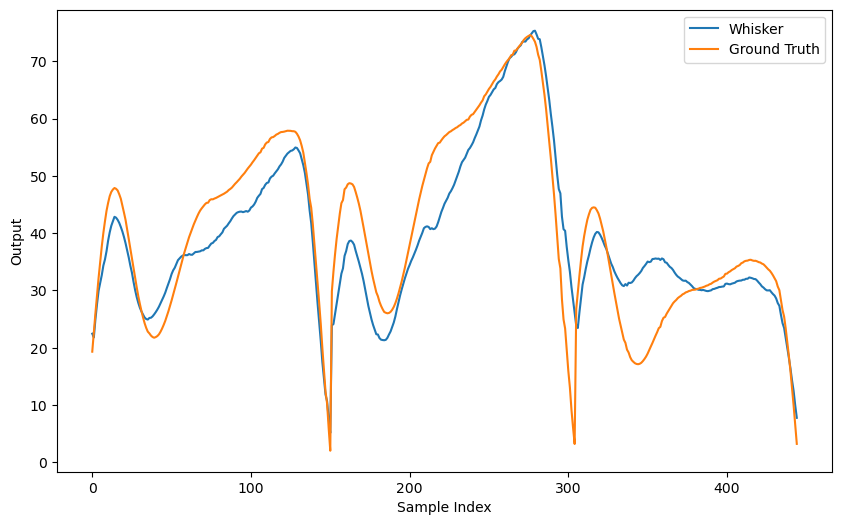

In [7]:
#KF Flat whisker1
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterFLAT
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filterFLAT(initial_state, initial_position, initial_yaw, test_pre, positions, yaws):
    kf = KalmanFilterFLAT(initial_state, initial_position, initial_yaw, initial_covariance, process_noise, measurement_noise)
    estimates = [np.array([initial_state])]
    for z, position, yaw in zip(test_pre[1:], positions[1:], yaws[1:]):
        kf.predict(position, yaw)
        kf.update(np.array([234 - z]))
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT1_filtered_1 = test_GT1_filtered[0:151]
test_GT1_filtered_2 = test_GT1_filtered[151:305]
test_GT1_filtered_3 = test_GT1_filtered[305:445]
test_pre1_1 = test_pre1[0:151]
test_pre1_2 = test_pre1[151:305]
test_pre1_3 = test_pre1[305:445]
test_position1_1 = test_position1_filtered[0:151]
test_position1_2 = test_position1_filtered[151:305]
test_position1_3 = test_position1_filtered[305:445]
test_yaw1_1 = test_orientation1_filtered[0:151]
test_yaw1_2 = test_orientation1_filtered[151:305]
test_yaw1_3 = test_orientation1_filtered[305:445]
# 初始状态和噪声配置
initial_states = [test_pre1_1[0], test_pre1_2[0], test_pre1_3[0]]
initial_positions = [test_position1_1[0], test_position1_2[0], test_position1_3[0]]
initial_yaws = [test_yaw1_1[0], test_yaw1_2[0], test_yaw1_3[0]]
initial_covariance = np.array([[50]])
process_noise = np.array([[0.01]])
measurement_noise = np.array([[1]])
print(test_yaw1_3)

# 应用卡尔曼滤波
test_kal1_1 = apply_kalman_filterFLAT(initial_states[0], initial_positions[0], initial_yaws[0], test_pre1_1, test_position1_1, test_yaw1_1)
test_kal1_2 = apply_kalman_filterFLAT(initial_states[1], initial_positions[1], initial_yaws[1],test_pre1_2, test_position1_2, test_yaw1_2)
test_kal1_3 = apply_kalman_filterFLAT(initial_states[2], initial_positions[2], initial_yaws[2],test_pre1_3, test_position1_3, test_yaw1_3)

# 合并结果
test_kal1 = test_kal1_1 + test_kal1_2 + test_kal1_3
print(test_kal1)
# 计算损失
MSE_loss = mean_squared_error(test_kal1, test_GT1_filtered)
MAE_loss = mean_absolute_error(test_kal1, test_GT1_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'FLAT_MLP_KF_test_image_save_whisker1'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_5_0.005_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal1, label='Whisker')
plt.plot(test_GT1_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

[array([22.456242], dtype=float32), array([24.46976821]), array([26.57361132]), array([28.98890171]), array([31.62653953]), array([33.33888303]), array([34.83986394]), array([36.90818143]), array([38.67311909]), array([40.08142088]), array([41.51177719]), array([42.67872668]), array([43.50075887]), array([43.96792721]), array([44.53175538]), array([44.2956347]), array([43.84423169]), array([43.07853228]), array([42.29655147]), array([41.47225045]), array([40.35606888]), array([39.12471322]), array([37.86895303]), array([36.45929381]), array([34.93909424]), array([33.77006343]), array([32.12369892]), array([30.88865909]), array([29.78031476]), array([28.74987424]), array([27.77687792]), array([27.28129073]), array([27.07209619]), array([27.40312422]), array([27.50657494]), array([27.02275723]), array([27.71806803]), array([27.47860708]), array([27.57133457]), array([27.8989516]), array([28.22305169]), array([28.46161307]), array([28.78718538]), array([29.10967148]), array([29.58604823])

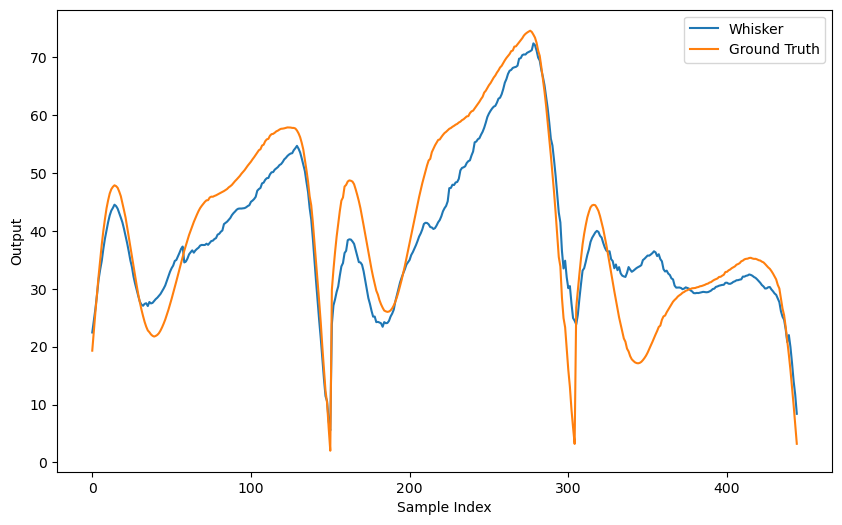

In [8]:
#UA KF Flat whisker1
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterUAFLAT
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filterUAFLAT(initial_state, initial_position, initial_yaw, test_pre, uncertainties, positions, yaws):
    kf = KalmanFilterUAFLAT(initial_state, initial_position, initial_yaw, initial_covariance, process_noise)
    estimates = [np.array([initial_state])]
    for z, uncertainty, position, yaw in zip(test_pre[1:], uncertainties[1:], positions[1:], yaws[1:]):
        kf.predict(position, yaw)
        measurement_noise = np.array([[uncertainty]])
        kf.update(np.array([234 - z]), measurement_noise)
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT1_filtered_1 = test_GT1_filtered[0:151]
test_GT1_filtered_2 = test_GT1_filtered[151:305]
test_GT1_filtered_3 = test_GT1_filtered[305:445]
test_pre1_1 = test_pre1[0:151]
test_pre1_2 = test_pre1[151:305]
test_pre1_3 = test_pre1[305:445]
test_position1_1 = test_position1_filtered[0:151]
test_position1_2 = test_position1_filtered[151:305]
test_position1_3 = test_position1_filtered[305:445]
test_yaw1_1 = test_orientation1_filtered[0:151]
test_yaw1_2 = test_orientation1_filtered[151:305]
test_yaw1_3 = test_orientation1_filtered[305:445]

# 假设 `test_uncertainty` 是你模型预测的不确定性输出
test_uncertainty1_1 = test_uncertainty1[0:151]
test_uncertainty1_2 = test_uncertainty1[151:305]
test_uncertainty1_3 = test_uncertainty1[305:445]

# 初始状态和噪声配置
initial_states = [test_pre1_1[0], test_pre1_2[0], test_pre1_3[0]]
initial_positions = [test_position1_1[0], test_position1_2[0], test_position1_3[0]]
initial_yaws = [test_yaw1_1[0], test_yaw1_2[0], test_yaw1_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[0.2]])

# 应用卡尔曼滤波
test_kal1_1 = apply_kalman_filterUAFLAT(initial_states[0], initial_positions[0], initial_yaws[0], test_pre1_1, test_uncertainty1_1, test_position1_1, test_yaw1_1)
test_kal1_2 = apply_kalman_filterUAFLAT(initial_states[1], initial_positions[1], initial_yaws[1],test_pre1_2, test_uncertainty1_2, test_position1_2, test_yaw1_2)
test_kal1_3 = apply_kalman_filterUAFLAT(initial_states[2], initial_positions[2], initial_yaws[2],test_pre1_3, test_uncertainty1_3, test_position1_3, test_yaw1_3)

# 合并结果
test_kal1 = test_kal1_1 + test_kal1_2 + test_kal1_3
print(test_kal1)
# 计算损失
MSE_loss = mean_squared_error(test_kal1, test_GT1_filtered)
MAE_loss = mean_absolute_error(test_kal1, test_GT1_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'UA_FLAT_MLP_KF_test_image_save_whisker1'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_5_0.005_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal1, label='Whisker')
plt.plot(test_GT1_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

[array([22.456242], dtype=float32), array([21.80849791]), array([24.96590548]), array([27.54102885]), array([29.70254676]), array([30.56207982]), array([31.33944338]), array([32.87443463]), array([33.43889183]), array([35.00399648]), array([37.85106463]), array([39.796439]), array([41.52027448]), array([42.7150449]), array([43.99105034]), array([43.41365256]), array([42.56387195]), array([42.03071486]), array([41.19045823]), array([40.82286447]), array([39.96176745]), array([38.86686131]), array([37.81481615]), array([36.89561725]), array([35.31899697]), array([34.23410928]), array([32.26099931]), array([30.81839715]), array([29.62325572]), array([29.01649631]), array([28.34378506]), array([27.98326778]), array([27.71463412]), array([27.13811362]), array([27.01866436]), array([27.01384688]), array([27.48539156]), array([27.30428898]), array([27.48403272]), array([27.80377267]), array([27.73479284]), array([27.99894579]), array([28.17325233]), array([28.38283981]), array([28.62447643]),

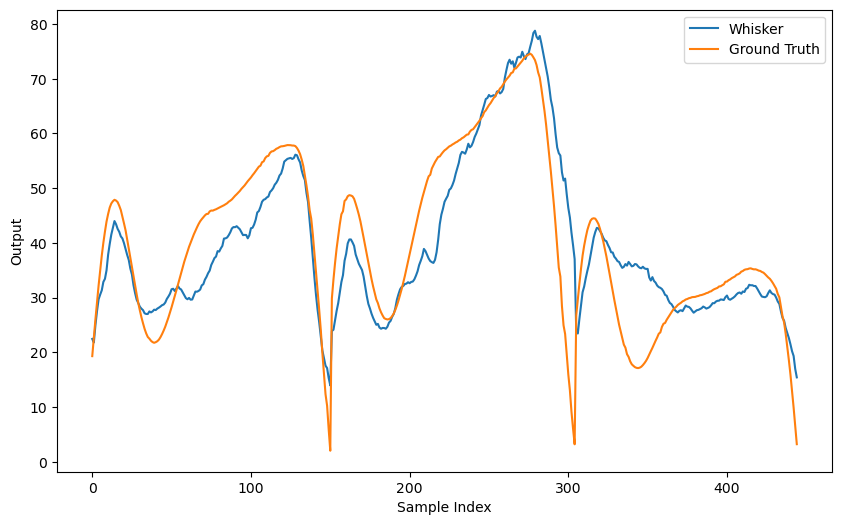

In [9]:
#KF Flat2 whisker1
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterFLAT2
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filterFLAT2(initial_state, initial_position, initial_yaw, test_pre, positions, yaws):
    kf = KalmanFilterFLAT2(initial_state, initial_position, initial_yaw, initial_covariance, process_noise, measurement_noise)
    estimates = [np.array([initial_state])]
    for z, position, yaw in zip(test_pre[1:], positions[1:], yaws[1:]):
        kf.predict(position, yaw)
        kf.update(np.array([234 - z]))
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT1_filtered_1 = test_GT1_filtered[0:151]
test_GT1_filtered_2 = test_GT1_filtered[151:305]
test_GT1_filtered_3 = test_GT1_filtered[305:445]
test_pre1_1 = test_pre1[0:151]
test_pre1_2 = test_pre1[151:305]
test_pre1_3 = test_pre1[305:445]
test_position1_1 = test_position1_filtered[0:151]
test_position1_2 = test_position1_filtered[151:305]
test_position1_3 = test_position1_filtered[305:445]
test_yaw1_1 = test_orientation1_filtered[0:151]
test_yaw1_2 = test_orientation1_filtered[151:305]
test_yaw1_3 = test_orientation1_filtered[305:445]
# 初始状态和噪声配置
initial_states = [test_pre1_1[0], test_pre1_2[0], test_pre1_3[0]]
initial_positions = [test_position1_1[0], test_position1_2[0], test_position1_3[0]]
initial_yaws = [test_yaw1_1[0], test_yaw1_2[0], test_yaw1_3[0]]
initial_covariance = np.array([[50]])
process_noise = np.array([[0.1]])
measurement_noise = np.array([[1]])

# 应用卡尔曼滤波
test_kal1_1 = apply_kalman_filterFLAT2(initial_states[0], initial_positions[0], initial_yaws[0], test_pre1_1, test_position1_1, test_yaw1_1)
test_kal1_2 = apply_kalman_filterFLAT2(initial_states[1], initial_positions[1], initial_yaws[1],test_pre1_2, test_position1_2, test_yaw1_2)
test_kal1_3 = apply_kalman_filterFLAT2(initial_states[2], initial_positions[2], initial_yaws[2],test_pre1_3, test_position1_3, test_yaw1_3)

# 合并结果
test_kal1 = test_kal1_1 + test_kal1_2 + test_kal1_3
print(test_kal1)
# 计算损失
MSE_loss = mean_squared_error(test_kal1, test_GT1_filtered)
MAE_loss = mean_absolute_error(test_kal1, test_GT1_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'FLAT_MLP_KF_test_image_save_whisker1'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_5_0.005_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal1, label='Whisker')
plt.plot(test_GT1_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

[array([22.456242], dtype=float32), array([23.80724917]), array([25.60773672]), array([27.66419137]), array([29.66843573]), array([29.57501599]), array([29.69330013]), array([31.7619782]), array([33.05937512]), array([34.66357136]), array([38.65767526]), array([40.16864618]), array([41.97009033]), array([42.82622595]), array([44.79698838]), array([43.94687576]), array([42.82371325]), array([42.36847898]), array([41.46138082]), array([41.75013642]), array([40.62828328]), array([39.34218517]), array([38.52612401]), array([37.62504446]), array([35.85992604]), array([35.09656982]), array([32.64069196]), array([31.64438251]), array([30.6253716]), array([30.26500946]), array([29.47731324]), array([29.68322602]), array([29.72211693]), array([29.02856613]), array([29.19964064]), array([28.53364378]), array([29.52134193]), array([28.78171083]), array([28.93866364]), array([29.37954872]), array([28.85324531]), array([28.84040965]), array([28.80988292]), array([28.75402241]), array([28.8704201]),

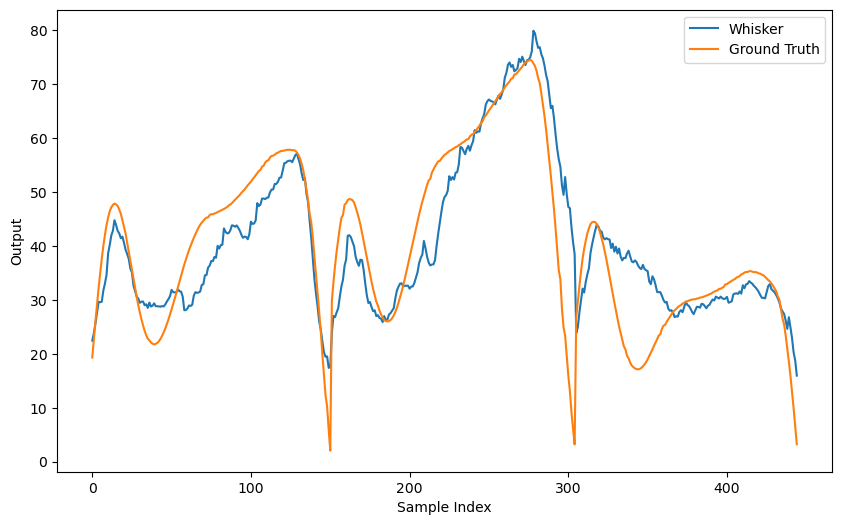

In [10]:
#UA KF Flat2 whisker1
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterUAFLAT2
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filterUAFLAT2(initial_state, initial_position, initial_yaw, test_pre, uncertainties, positions, yaws):
    kf = KalmanFilterUAFLAT2(initial_state, initial_position, initial_yaw, initial_covariance, process_noise)
    estimates = [np.array([initial_state])]
    for z, uncertainty, position, yaw in zip(test_pre[1:], uncertainties[1:], positions[1:], yaws[1:]):
        kf.predict(position, yaw)
        measurement_noise = np.array([[uncertainty]])
        kf.update(np.array([234 - z]), measurement_noise)
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT1_filtered_1 = test_GT1_filtered[0:151]
test_GT1_filtered_2 = test_GT1_filtered[151:305]
test_GT1_filtered_3 = test_GT1_filtered[305:445]
test_pre1_1 = test_pre1[0:151]
test_pre1_2 = test_pre1[151:305]
test_pre1_3 = test_pre1[305:445]
test_position1_1 = test_position1_filtered[0:151]
test_position1_2 = test_position1_filtered[151:305]
test_position1_3 = test_position1_filtered[305:445]
test_yaw1_1 = test_orientation1_filtered[0:151]
test_yaw1_2 = test_orientation1_filtered[151:305]
test_yaw1_3 = test_orientation1_filtered[305:445]

# 假设 `test_uncertainty` 是你模型预测的不确定性输出
test_uncertainty1_1 = test_uncertainty1[0:151]
test_uncertainty1_2 = test_uncertainty1[151:305]
test_uncertainty1_3 = test_uncertainty1[305:445]

# 初始状态和噪声配置
initial_states = [test_pre1_1[0], test_pre1_2[0], test_pre1_3[0]]
initial_positions = [test_position1_1[0], test_position1_2[0], test_position1_3[0]]
initial_yaws = [test_yaw1_1[0], test_yaw1_2[0], test_yaw1_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[5]])

# 应用卡尔曼滤波
test_kal1_1 = apply_kalman_filterUAFLAT2(initial_states[0], initial_positions[0], initial_yaws[0], test_pre1_1, test_uncertainty1_1, test_position1_1, test_yaw1_1)
test_kal1_2 = apply_kalman_filterUAFLAT2(initial_states[1], initial_positions[1], initial_yaws[1],test_pre1_2, test_uncertainty1_2, test_position1_2, test_yaw1_2)
test_kal1_3 = apply_kalman_filterUAFLAT2(initial_states[2], initial_positions[2], initial_yaws[2],test_pre1_3, test_uncertainty1_3, test_position1_3, test_yaw1_3)

# 合并结果
test_kal1 = test_kal1_1 + test_kal1_2 + test_kal1_3
print(test_kal1)
# 计算损失
MSE_loss = mean_squared_error(test_kal1, test_GT1_filtered)
MAE_loss = mean_absolute_error(test_kal1, test_GT1_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'UA_FLAT2_MLP_KF_test_image_save_whisker1'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_5_0.005_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal1, label='Whisker')
plt.plot(test_GT1_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

tensor([[26.4780],
        [30.1610],
        [30.8558],
        [33.6704],
        [33.4167],
        [35.2227],
        [39.2142],
        [42.8969],
        [44.8988],
        [47.7644],
        [51.6410],
        [54.0960],
        [56.0042],
        [55.0480],
        [56.7271],
        [57.4329],
        [54.6814],
        [57.8448],
        [54.4729],
        [52.8821],
        [52.2067],
        [49.2687],
        [48.5783],
        [48.2336],
        [48.0668],
        [46.0388],
        [45.2050],
        [44.0675],
        [44.0262],
        [43.9603],
        [42.1568],
        [41.0945]], device='cuda:0') tensor([19.4162, 22.9306, 26.3041, 29.4483, 32.6249, 35.4714, 38.2090, 40.6245,
        42.7263, 44.6563, 46.1223, 47.3967, 48.2679, 48.7970, 49.1928, 49.1999,
        49.0688, 48.5818, 47.9773, 46.9796, 45.9458, 44.7728, 43.4724, 41.8905,
        40.4189, 39.0021, 37.4630, 35.9302, 34.5633, 33.1849, 32.0239, 30.9426],
       device='cuda:0')
tensor([[101.6410],
        [

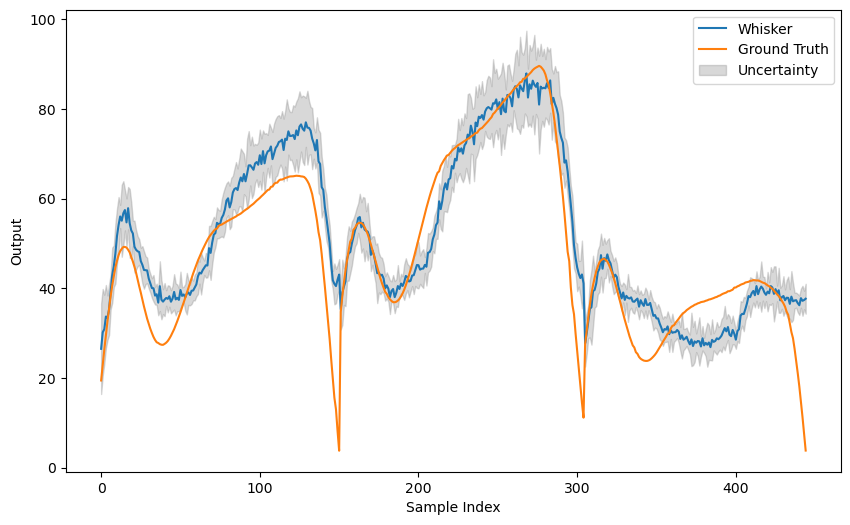

In [11]:
#whisker2 uncertainty aware mlp
from uncertainty import *
from model import *
from torch.utils.data import DataLoader, TensorDataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP_adf_dropout(input_size=3, hidden_size=32, output_size=1, p=0.05, noise_variance=0.01, min_variance=0.001).to(device)
best_model_path='MLP_best_model_save/mlp_bs_32_lr_0.001_reg_0.01_do_0.1_rmse_10.2471_whisker2.pt'
model.load_state_dict(torch.load(best_model_path))
test_whisker_tensor = torch.Tensor(test_whisker2_filtered1)
test_GT_tensor = torch.Tensor(test_GT2_filtered)
test_dataset = TensorDataset(test_whisker_tensor, test_GT_tensor)
testloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
test_image_folder = 'UA_MLP_test_image_save_whisker2'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker2.png'
eval_time = time.time()
RMSE, MAE, neg_log_likelihood, test_pre2, test_uncertainty2 = evaluate(
        model,
        test_dataset,
        test_image_output_file,
        use_adf=True, 
        use_mcdo=True)

eval_time = time.time() - eval_time

print('RMSE                = {}'.format(RMSE))
print('MAE             = {}'.format(MAE))
print('Negative log-likelihood = {}'.format(neg_log_likelihood))
print('Time                    = {}'.format(eval_time))

[array([26.478025], dtype=float32), array([30.15662602]), array([32.1744036]), array([34.73322267]), array([36.71964251]), array([38.61350765]), array([40.92355355]), array([43.22268061]), array([45.21274765]), array([47.16767351]), array([48.94986602]), array([50.61621602]), array([51.92184955]), array([52.65687028]), array([53.35898335]), array([53.69811226]), array([53.57804438]), array([53.46511897]), array([52.91034348]), array([51.8922707]), array([50.86708074]), array([49.566774]), array([48.14296567]), array([46.62981693]), array([45.32440807]), array([44.00246267]), array([42.61819487]), array([41.26149213]), array([40.19386314]), array([39.2126266]), array([38.35694705]), array([37.5592625]), array([36.86251317]), array([36.30240553]), array([35.81220102]), array([35.55613294]), array([35.47806441]), array([35.65740754]), array([35.65179898]), array([35.6994083]), array([35.97651035]), array([36.36355827]), array([36.77083417]), array([37.33734229]), array([37.8213298]), arra

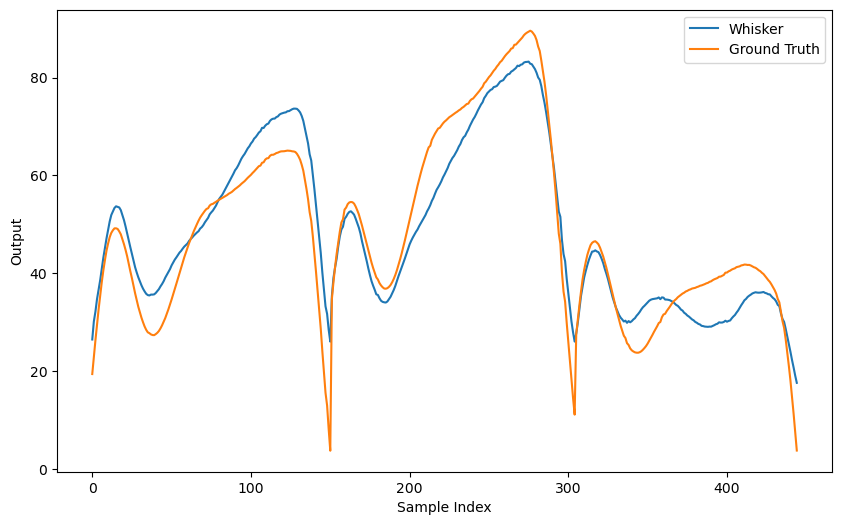

In [12]:
#KF Flat whisker2
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterFLAT
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filterFLAT(initial_state, initial_position, initial_yaw, test_pre, positions, yaws):
    kf = KalmanFilterFLAT(initial_state, initial_position, initial_yaw, initial_covariance, process_noise, measurement_noise)
    estimates = [np.array([initial_state])]
    for z, position, yaw in zip(test_pre[1:], positions[1:], yaws[1:]):
        kf.predict(position, yaw)
        kf.update(np.array([234 - z]))
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT2_filtered_1 = test_GT2_filtered[0:151]
test_GT2_filtered_2 = test_GT2_filtered[151:305]
test_GT2_filtered_3 = test_GT2_filtered[305:445]
test_pre2_1 = test_pre2[0:151]
test_pre2_2 = test_pre2[151:305]
test_pre2_3 = test_pre2[305:445]
test_position2_1 = test_position2_filtered[0:151]
test_position2_2 = test_position2_filtered[151:305]
test_position2_3 = test_position2_filtered[305:445]
test_yaw2_1 = test_orientation2_filtered[0:151]
test_yaw2_2 = test_orientation2_filtered[151:305]
test_yaw2_3 = test_orientation2_filtered[305:445]
# 初始状态和噪声配置
initial_states = [test_pre2_1[0], test_pre2_2[0], test_pre2_3[0]]
initial_positions = [test_position2_1[0], test_position2_2[0], test_position2_3[0]]
initial_yaws = [test_yaw2_1[0], test_yaw2_2[0], test_yaw2_3[0]]
initial_covariance = np.array([[50]])
process_noise = np.array([[0.01]])
measurement_noise = np.array([[1]])

# 应用卡尔曼滤波
test_kal2_1 = apply_kalman_filterFLAT(initial_states[0], initial_positions[0], initial_yaws[0], test_pre2_1, test_position2_1, test_yaw2_1)
test_kal2_2 = apply_kalman_filterFLAT(initial_states[1], initial_positions[1], initial_yaws[1],test_pre2_2, test_position2_2, test_yaw2_2)
test_kal2_3 = apply_kalman_filterFLAT(initial_states[2], initial_positions[2], initial_yaws[2],test_pre2_3, test_position2_3, test_yaw2_3)

# 合并结果
test_kal2 = test_kal2_1 + test_kal2_2 + test_kal2_3
print(test_kal2)
# 计算损失
MSE_loss = mean_squared_error(test_kal2, test_GT2_filtered)
MAE_loss = mean_absolute_error(test_kal2, test_GT2_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'FLAT_MLP_KF_test_image_save_whisker2'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_5_0.005_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal2, label='Whisker')
plt.plot(test_GT2_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

[array([26.478025], dtype=float32), array([30.01468958]), array([32.45075393]), array([34.98462354]), array([36.33163351]), array([38.23357678]), array([40.35622456]), array([42.73943775]), array([44.8041758]), array([46.75887405]), array([48.49065931]), array([50.07558058]), array([52.67409304]), array([53.18428439]), array([53.64033429]), array([53.99631785]), array([53.82687775]), array([53.69777631]), array([53.03016132]), array([51.96417169]), array([51.13761172]), array([49.83263848]), array([48.38404035]), array([46.94988706]), array([45.89979893]), array([44.65050893]), array([43.19126859]), array([41.77016213]), array([40.8812451]), array([40.19282367]), array([39.74774392]), array([39.1916895]), array([38.54961447]), array([37.89008319]), array([37.42705686]), array([37.15440202]), array([36.91898108]), array([36.73950032]), array([36.60601538]), array([36.59407723]), array([36.78618837]), array([37.28671399]), array([37.60656529]), array([38.10470719]), array([38.41526049]),

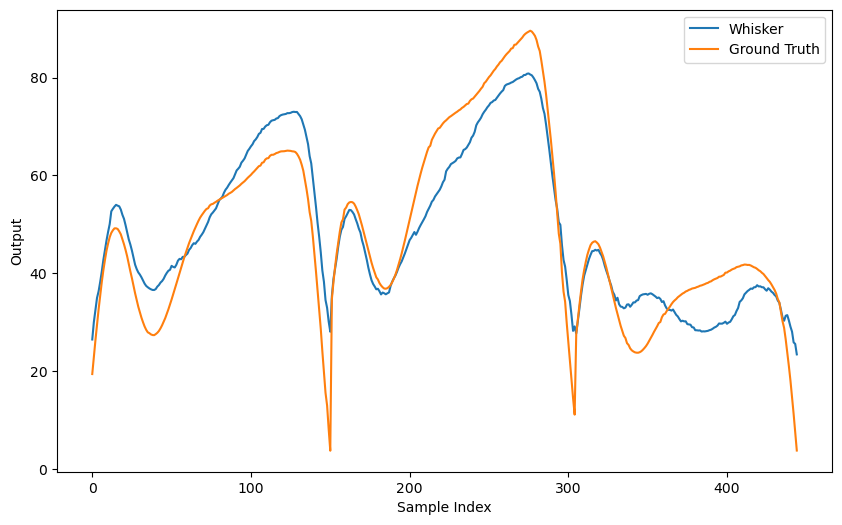

In [13]:
#UA KF Flat whisker2
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterUAFLAT
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filterUAFLAT(initial_state, initial_position, initial_yaw, test_pre, uncertainties, positions, yaws):
    kf = KalmanFilterUAFLAT(initial_state, initial_position, initial_yaw, initial_covariance, process_noise)
    estimates = [np.array([initial_state])]
    for z, uncertainty, position, yaw in zip(test_pre[1:], uncertainties[1:], positions[1:], yaws[1:]):
        kf.predict(position, yaw)
        measurement_noise = np.array([[uncertainty]])
        kf.update(np.array([234 - z]), measurement_noise)
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT2_filtered_1 = test_GT2_filtered[0:151]
test_GT2_filtered_2 = test_GT2_filtered[151:305]
test_GT2_filtered_3 = test_GT2_filtered[305:445]
test_pre2_1 = test_pre2[0:151]
test_pre2_2 = test_pre2[151:305]
test_pre2_3 = test_pre2[305:445]
test_position2_1 = test_position2_filtered[0:151]
test_position2_2 = test_position2_filtered[151:305]
test_position2_3 = test_position2_filtered[305:445]
test_yaw2_1 = test_orientation2_filtered[0:151]
test_yaw2_2 = test_orientation2_filtered[151:305]
test_yaw2_3 = test_orientation2_filtered[305:445]

# 假设 `test_uncertainty` 是你模型预测的不确定性输出
test_uncertainty2_1 = test_uncertainty2[0:151]
test_uncertainty2_2 = test_uncertainty2[151:305]
test_uncertainty2_3 = test_uncertainty2[305:445]

# 初始状态和噪声配置
initial_states = [test_pre2_1[0], test_pre2_2[0], test_pre2_3[0]]
initial_positions = [test_position2_1[0], test_position2_2[0], test_position2_3[0]]
initial_yaws = [test_yaw2_1[0], test_yaw2_2[0], test_yaw2_3[0]]
initial_covariance = np.array([[50]])
process_noise = np.array([[0.2]])

# 应用卡尔曼滤波
test_kal2_1 = apply_kalman_filterUAFLAT(initial_states[0], initial_positions[0], initial_yaws[0], test_pre2_1, test_uncertainty2_1, test_position2_1, test_yaw2_1)
test_kal2_2 = apply_kalman_filterUAFLAT(initial_states[1], initial_positions[1], initial_yaws[1],test_pre2_2, test_uncertainty2_2, test_position2_2, test_yaw2_2)
test_kal2_3 = apply_kalman_filterUAFLAT(initial_states[2], initial_positions[2], initial_yaws[2],test_pre2_3, test_uncertainty2_3, test_position2_3, test_yaw2_3)

# 合并结果
test_kal2 = test_kal2_1 + test_kal2_2 + test_kal2_3
print(test_kal2)
# 计算损失
MSE_loss = mean_squared_error(test_kal2, test_GT2_filtered)
MAE_loss = mean_absolute_error(test_kal2, test_GT2_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'UA_FLAT_MLP_KF_test_image_save_whisker2'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker2_kf_certainnoise_5_0.02_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal2, label='Whisker')
plt.plot(test_GT2_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

[array([26.478025], dtype=float32), array([30.15663378]), array([32.11679827]), array([34.62283474]), array([36.34013346]), array([37.96704056]), array([40.23849977]), array([42.67372756]), array([44.75554707]), array([46.91573675]), array([49.1938384]), array([51.36720073]), array([53.15649635]), array([53.9490288]), array([54.87004942]), array([55.43365515]), array([54.98721047]), array([55.23835722]), array([54.4138427]), array([53.07575751]), array([51.86538881]), array([50.11219991]), array([48.48680008]), array([47.01144775]), array([45.96256707]), array([44.67840319]), array([43.39969265]), array([42.15190256]), array([41.36739362]), array([40.73708965]), array([39.96609482]), array([39.16630031]), array([38.391735]), array([37.85123536]), array([37.16443725]), array([36.87198881]), array([36.54284619]), array([37.09068031]), array([36.76162033]), array([36.47768885]), array([36.39675902]), array([36.80998054]), array([36.97511723]), array([37.37353182]), array([37.39922973]), a

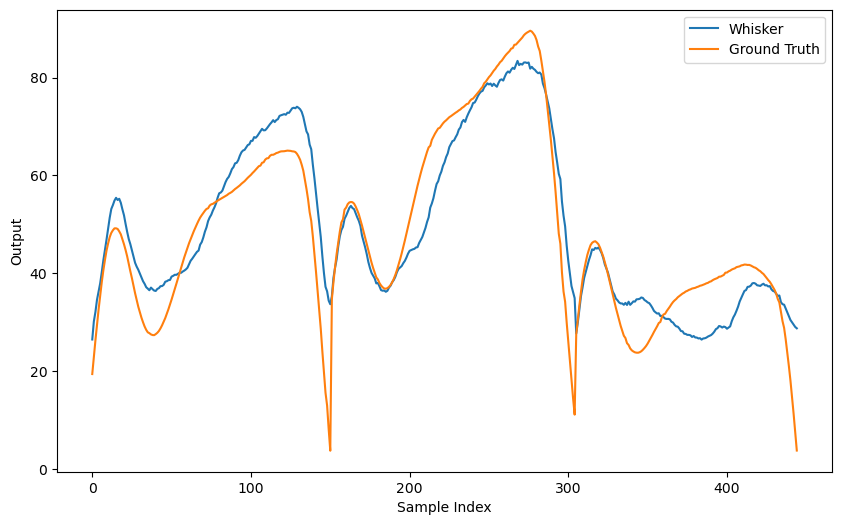

In [14]:
#KF Flat2 whisker2
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterFLAT2
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filterFLAT2(initial_state, initial_position, initial_yaw, test_pre, positions, yaws):
    kf = KalmanFilterFLAT2(initial_state, initial_position, initial_yaw, initial_covariance, process_noise, measurement_noise)
    estimates = [np.array([initial_state])]
    for z, position, yaw in zip(test_pre[1:], positions[1:], yaws[1:]):
        kf.predict(position, yaw)
        kf.update(np.array([234 - z]))
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT2_filtered_1 = test_GT2_filtered[0:151]
test_GT2_filtered_2 = test_GT2_filtered[151:305]
test_GT2_filtered_3 = test_GT2_filtered[305:445]
test_pre2_1 = test_pre2[0:151]
test_pre2_2 = test_pre2[151:305]
test_pre2_3 = test_pre2[305:445]
test_position2_1 = test_position2_filtered[0:151]
test_position2_2 = test_position2_filtered[151:305]
test_position2_3 = test_position2_filtered[305:445]
test_yaw2_1 = test_orientation2_filtered[0:151]
test_yaw2_2 = test_orientation2_filtered[151:305]
test_yaw2_3 = test_orientation2_filtered[305:445]
# 初始状态和噪声配置
initial_states = [test_pre2_1[0], test_pre2_2[0], test_pre2_3[0]]
initial_positions = [test_position2_1[0], test_position2_2[0], test_position2_3[0]]
initial_yaws = [test_yaw2_1[0], test_yaw2_2[0], test_yaw2_3[0]]
initial_covariance = np.array([[50]])
process_noise = np.array([[0.1]])
measurement_noise = np.array([[1]])

# 应用卡尔曼滤波
test_kal2_1 = apply_kalman_filterFLAT2(initial_states[0], initial_positions[0], initial_yaws[0], test_pre2_1, test_position2_1, test_yaw2_1)
test_kal2_2 = apply_kalman_filterFLAT2(initial_states[1], initial_positions[1], initial_yaws[1],test_pre2_2, test_position2_2, test_yaw2_2)
test_kal2_3 = apply_kalman_filterFLAT2(initial_states[2], initial_positions[2], initial_yaws[2],test_pre2_3, test_position2_3, test_yaw2_3)

# 合并结果
test_kal2 = test_kal2_1 + test_kal2_2 + test_kal2_3
print(test_kal2)
# 计算损失
MSE_loss = mean_squared_error(test_kal2, test_GT2_filtered)
MAE_loss = mean_absolute_error(test_kal2, test_GT2_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'FLAT2_MLP_KF_test_image_save_whisker2'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_5_0.005_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal2, label='Whisker')
plt.plot(test_GT2_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

[array([26.478025], dtype=float32), array([30.01846017]), array([32.36435366]), array([34.8264701]), array([35.83792858]), array([37.52078347]), array([39.72129467]), array([42.26201186]), array([44.51651784]), array([46.65558442]), array([48.98689933]), array([51.18595673]), array([54.69792563]), array([55.07916735]), array([55.57417644]), array([56.20149651]), array([55.51501561]), array([55.89306843]), array([54.94899832]), array([53.47144875]), array([52.1804076]), array([50.42243369]), array([48.69623381]), array([47.49284672]), array([46.9652593]), array([45.59720269]), array([44.15318151]), array([42.86161681]), array([42.59401542]), array([42.43998187]), array([41.67886751]), array([40.73833481]), array([39.74821925]), array([39.10370445]), array([38.226336]), array([38.0198696]), array([37.21663907]), array([37.30901409]), array([36.97509168]), array([36.78921722]), array([36.75438202]), array([37.56803133]), array([37.54645097]), array([37.96824113]), array([37.54406989]), ar

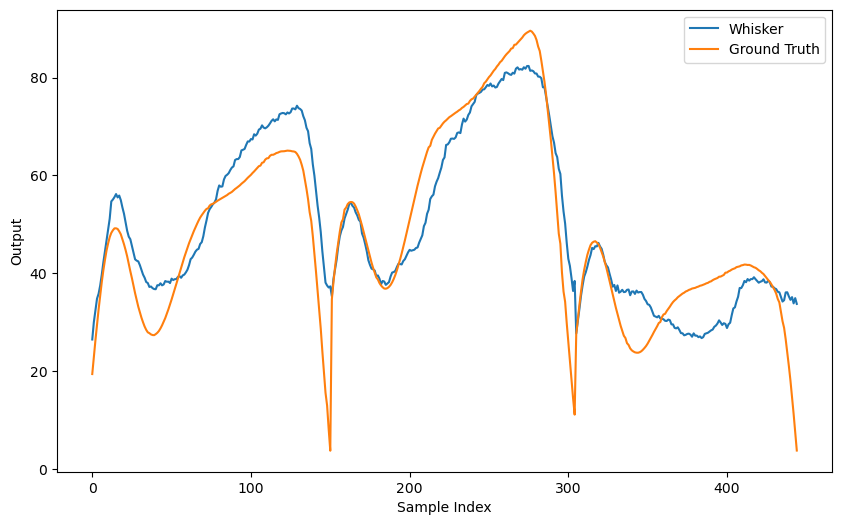

In [15]:
#UA KF Flat2 whisker2
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterUAFLAT2
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filterUAFLAT2(initial_state, initial_position, initial_yaw, test_pre, uncertainties, positions, yaws):
    kf = KalmanFilterUAFLAT2(initial_state, initial_position, initial_yaw, initial_covariance, process_noise)
    estimates = [np.array([initial_state])]
    for z, uncertainty, position, yaw in zip(test_pre[1:], uncertainties[1:], positions[1:], yaws[1:]):
        kf.predict(position, yaw)
        measurement_noise = np.array([[uncertainty]])
        kf.update(np.array([234 - z]), measurement_noise)
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT2_filtered_1 = test_GT2_filtered[0:151]
test_GT2_filtered_2 = test_GT2_filtered[151:305]
test_GT2_filtered_3 = test_GT2_filtered[305:445]
test_pre2_1 = test_pre2[0:151]
test_pre2_2 = test_pre2[151:305]
test_pre2_3 = test_pre2[305:445]
test_position2_1 = test_position2_filtered[0:151]
test_position2_2 = test_position2_filtered[151:305]
test_position2_3 = test_position2_filtered[305:445]
test_yaw2_1 = test_orientation2_filtered[0:151]
test_yaw2_2 = test_orientation2_filtered[151:305]
test_yaw2_3 = test_orientation2_filtered[305:445]

# 假设 `test_uncertainty` 是你模型预测的不确定性输出
test_uncertainty2_1 = test_uncertainty2[0:151]
test_uncertainty2_2 = test_uncertainty2[151:305]
test_uncertainty2_3 = test_uncertainty2[305:445]

# 初始状态和噪声配置
initial_states = [test_pre2_1[0], test_pre2_2[0], test_pre2_3[0]]
initial_positions = [test_position2_1[0], test_position2_2[0], test_position2_3[0]]
initial_yaws = [test_yaw2_1[0], test_yaw2_2[0], test_yaw2_3[0]]
initial_covariance = np.array([[50]])
process_noise = np.array([[4]])

# 应用卡尔曼滤波
test_kal2_1 = apply_kalman_filterUAFLAT2(initial_states[0], initial_positions[0], initial_yaws[0], test_pre2_1, test_uncertainty2_1, test_position2_1, test_yaw2_1)
test_kal2_2 = apply_kalman_filterUAFLAT2(initial_states[1], initial_positions[1], initial_yaws[1],test_pre2_2, test_uncertainty2_2, test_position2_2, test_yaw2_2)
test_kal2_3 = apply_kalman_filterUAFLAT2(initial_states[2], initial_positions[2], initial_yaws[2],test_pre2_3, test_uncertainty2_3, test_position2_3, test_yaw2_3)

# 合并结果
test_kal2 = test_kal2_1 + test_kal2_2 + test_kal2_3
print(test_kal2)
# 计算损失
MSE_loss = mean_squared_error(test_kal2, test_GT2_filtered)
MAE_loss = mean_absolute_error(test_kal2, test_GT2_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'UA_FLAT_MLP_KF_test_image_save_whisker2'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker2_kf_certainnoise_5_0.02_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal2, label='Whisker')
plt.plot(test_GT2_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

MSE = 83.94888541499792
MAE = 6.708572030581872


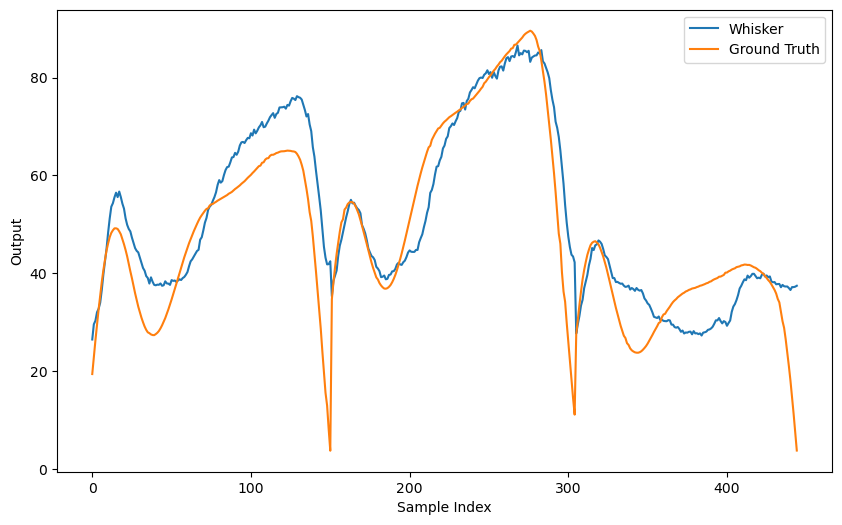

In [16]:
#KF whisker2
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilter
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filter(initial_state, test_pre):
    kf = KalmanFilter(initial_state, initial_covariance, process_noise, measurement_noise)
    estimates = [np.array([initial_state])]
    for z in test_pre[1:]:
        kf.predict()
        kf.update(np.array([z]))
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT2_filtered_1 = test_GT2_filtered[0:151]
test_GT2_filtered_2 = test_GT2_filtered[151:305]
test_GT2_filtered_3 = test_GT2_filtered[305:445]
test_pre2_1 = test_pre2[0:151]
test_pre2_2 = test_pre2[151:305]
test_pre2_3 = test_pre2[305:445]

# 初始状态和噪声配置
initial_states = [test_pre2_1[0], test_pre2_2[0], test_pre2_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[0.5]])
measurement_noise = np.array([[1]])

# 应用卡尔曼滤波
test_kal2_1 = apply_kalman_filter(initial_states[0], test_pre2_1)
test_kal2_2 = apply_kalman_filter(initial_states[1], test_pre2_2)
test_kal2_3 = apply_kalman_filter(initial_states[2], test_pre2_3)

# 合并结果
test_kal2 = test_kal2_1 + test_kal2_2 + test_kal2_3

# 计算损失
MSE_loss = mean_squared_error(test_kal2, test_GT2_filtered)
MAE_loss = mean_absolute_error(test_kal2, test_GT2_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'MLP_KF_test_image_save_whisker2'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker2_kf_certainnoise_5_0.5_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal2, label='Whisker')
plt.plot(test_GT2_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

MSE = 107.23880251945108
MAE = 7.622104574439739


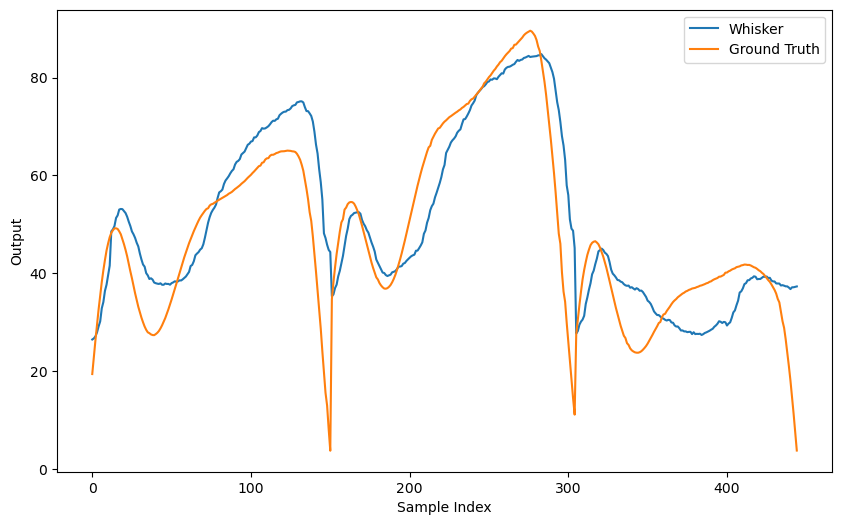

In [17]:
#uncertainty KF whisker2
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterUA
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filter(initial_state, test_pre, uncertainties):
    kf = KalmanFilterUA(initial_state, initial_covariance, process_noise)
    estimates = [np.array([initial_state])]
    for z, uncertainty in zip(test_pre[1:], uncertainties[1:]):
        kf.predict()
        measurement_noise = np.array([[uncertainty]])  # 动态测量噪声
        kf.update(np.array([z]), measurement_noise)  # 传递动态噪声到更新步骤
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT2_filtered_1 = test_GT2_filtered[0:151]
test_GT2_filtered_2 = test_GT2_filtered[151:305]
test_GT2_filtered_3 = test_GT2_filtered[305:445]
test_pre2_1 = test_pre2[0:151]
test_pre2_2 = test_pre2[151:305]
test_pre2_3 = test_pre2[305:445]

# 假设 `test_uncertainty` 是你模型预测的不确定性输出
test_uncertainty2_1 = test_uncertainty2[0:151]
test_uncertainty2_2 = test_uncertainty2[151:305]
test_uncertainty2_3 = test_uncertainty2[305:445]

# 初始状态和噪声配置
initial_states = [test_pre2_1[0], test_pre2_2[0], test_pre2_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[1]])

# 应用卡尔曼滤波
test_kal2_1 = apply_kalman_filter(initial_states[0], test_pre2_1, test_uncertainty2_1)
test_kal2_2 = apply_kalman_filter(initial_states[1], test_pre2_2, test_uncertainty2_2)
test_kal2_3 = apply_kalman_filter(initial_states[2], test_pre2_3, test_uncertainty2_3)
# 合并结果
test_kal2 = test_kal2_1 + test_kal2_2 + test_kal2_3

# 计算损失
MSE_loss = mean_squared_error(test_kal2, test_GT2_filtered)
MAE_loss = mean_absolute_error(test_kal2, test_GT2_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'UA_MLP_KF_test_image_save_whisker2'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker2_kf_UAnoise_5_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal2, label='Whisker')
plt.plot(test_GT2_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)

relative_rad = 0.080262876669567
wall_rad = 0.07822863030354851
relative_rad = [0.15330861]
wall_rad = [0.14946128]
relative_rad = [0.13816634]
wall_rad = [0.13279128]
relative_rad = [0.13914621]
wall_rad = [0.13242153]
relative_rad = [0.13197077]
wall_rad = [0.12395799]
relative_rad = [0.14769958]
wall_rad = [0.1384965]
relative_rad = [0.17736891]
wall_rad = [0.16686656]
relative_rad = [0.19531463]
wall_rad = [0.18349016]
relative_rad = [0.22480414]
wall_rad = [0.21159967]
relative_rad = [0.23671388]
wall_rad = [0.22179762]
relative_rad = [0.22646331]
wall_rad = [0.20977478]
relative_rad = [0.23140592]
wall_rad = [0.21261402]
relative_rad = [0.2334075]
wall_rad = [0.21209298]
relative_rad = [0.22620215]
wall_rad = [0.20255356]
relative_rad = [0.21997842]
wall_rad = [0.19368811]
relative_rad = [0.24212125]
wall_rad = [0.2129937]
relative_rad = [0.25038036]
wall_rad = [0.21804183]
relative_rad = [0.26572385]
wall_rad = [0.22992415]
relative_rad = [0.26665544]
wall_rad = [0.22722468]
rel

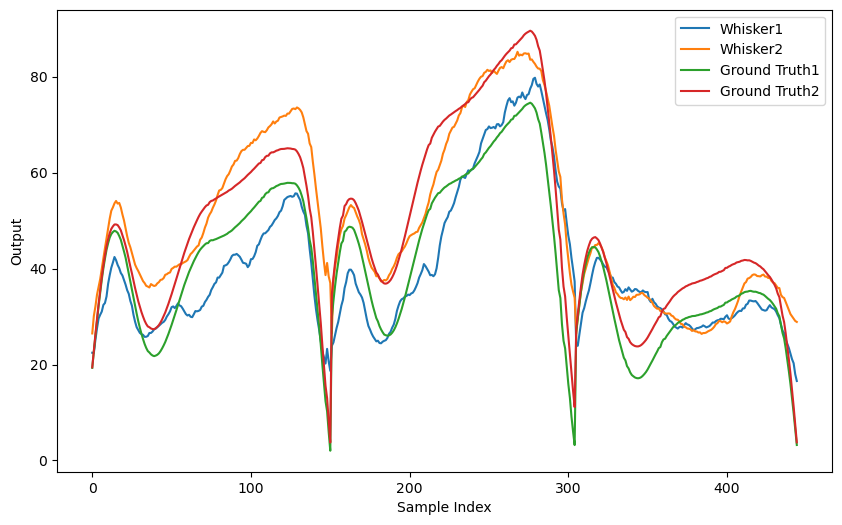

In [20]:
#KF Flat3 whisker1 and whisker2
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilterFLAT3
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filterFLAT3(initial_state1, initial_state2, initial_position, initial_yaw, test_pre1, test_pre2, positions, yaws):
    kf = KalmanFilterFLAT3(initial_state1, initial_state2, initial_position, initial_yaw, initial_covariance, process_noise, measurement_noise)
    estimates1 = [np.array([initial_state1])]
    estimates2 = [np.array([initial_state2])]
    estimates = [np.array([0])]
    for z1, z2, position, yaw in zip(test_pre1[1:], test_pre2[1:], positions[1:], yaws[1:]):
        kf.predict(position, yaw)
        kf.update(np.array([234 - z1]), np.array([234 - z2]))
        estimate1, estimate2, estimate = kf.get_current_estimate()
        estimates1.append(estimate1)
        estimates2.append(estimate2)
        estimates.append(estimate)
    return estimates1, estimates2, estimates

# 数据分段 whisker1
test_GT1_filtered_1 = test_GT1_filtered[0:151]
test_GT1_filtered_2 = test_GT1_filtered[151:305]
test_GT1_filtered_3 = test_GT1_filtered[305:445]
test_pre1_1 = test_pre1[0:151]
test_pre1_2 = test_pre1[151:305]
test_pre1_3 = test_pre1[305:445]

# 数据分段 whisker2
test_GT2_filtered_1 = test_GT2_filtered[0:151]
test_GT2_filtered_2 = test_GT2_filtered[151:305]
test_GT2_filtered_3 = test_GT2_filtered[305:445]
test_pre2_1 = test_pre2[0:151]
test_pre2_2 = test_pre2[151:305]
test_pre2_3 = test_pre2[305:445]

# 数据分段 both
test_position_1 = test_position1_filtered[0:151]
test_position_2 = test_position1_filtered[151:305]
test_position_3 = test_position1_filtered[305:445]
test_yaw_1 = test_orientation1_filtered[0:151]
test_yaw_2 = test_orientation1_filtered[151:305]
test_yaw_3 = test_orientation1_filtered[305:445]

# 初始状态和噪声配置
initial_states1 = [test_pre1_1[0], test_pre1_2[0], test_pre1_3[0]]
initial_states2 = [test_pre2_1[0], test_pre2_2[0], test_pre2_3[0]]
initial_positions = [test_position_1[0], test_position_2[0], test_position_3[0]]
initial_yaws = [test_yaw_1[0], test_yaw_2[0], test_yaw_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[0.1]])
measurement_noise = np.array([[1]])

# 应用卡尔曼滤波
test_kal1_1, test_kal2_1, test_kal_1 = apply_kalman_filterFLAT3(initial_states1[0], initial_states2[0], initial_positions[0], initial_yaws[0], test_pre1_1, test_pre2_1, test_position_1, test_yaw_1)
test_kal1_2, test_kal2_2, test_kal_2 = apply_kalman_filterFLAT3(initial_states1[1], initial_states2[0], initial_positions[1], initial_yaws[1], test_pre1_2, test_pre2_2, test_position_2, test_yaw_2)
test_kal1_3, test_kal2_3, test_kal_3 = apply_kalman_filterFLAT3(initial_states1[2], initial_states2[0], initial_positions[2], initial_yaws[2], test_pre1_3, test_pre2_3, test_position_3, test_yaw_3)

# 合并结果
test_kal1 = test_kal1_1 + test_kal1_2 + test_kal1_3
test_kal2 = test_kal2_1 + test_kal2_2 + test_kal2_3
test_kal = test_kal_1 + test_kal_2 + test_kal_3
print(test_kal1)
print(test_kal2)
# 计算损失
MSE_loss_1 = mean_squared_error(test_kal1, test_GT1_filtered)
MAE_loss_1 = mean_absolute_error(test_kal1, test_GT1_filtered)
MSE_loss_2 = mean_squared_error(test_kal2, test_GT2_filtered)
MAE_loss_2 = mean_absolute_error(test_kal2, test_GT2_filtered)

print(f'whisker1 MSE = {MSE_loss_1}')
print(f'whisker1 MAE = {MAE_loss_1}')
print(f'whisker2 MSE = {MSE_loss_2}')
print(f'whisker2 MAE = {MAE_loss_2}')

# 保存图像
test_image_folder = 'FLAT3_MLP_KF_test_image_save_whisker1+2'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file_1 = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_50_0.1_1_1.png'

plt.figure(figsize=(10, 6))
# plt.plot(test_kal, label='Whisker')
plt.plot(test_kal1, label='Whisker1')
plt.plot(test_kal2, label='Whisker2')
plt.plot(test_GT1_filtered, label='Ground Truth1')
plt.plot(test_GT2_filtered, label='Ground Truth2')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)
